<img src='https://coopersystem.com.br/wp-content/uploads/2020/10/blogpost-inteligencia-artificial-fatos-1024x322.png' height="100%" width="3500">

# <font color=blue|blue|red>Case Inteligência Artificial</font> 

Opa, tudo bom? Seja muito bem vindo ao Case de IA!

<ins>**_Qual será sua task:_**</ins>

"Você foi contratado como um Cientista de Dados de uma grande empresa. Logo no primeiro dia de trabalho seus superiores lhe mostraram os diversos problemas e desafios que você teria que resolver. Um deles está relacionado à uma base de dados do naufrágio do Titanic e seu objetivo seria desenvolver um modelo de Machine Learning que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input. Você logo de cara lembrou do KNN, um ótimo modelo de classificação e decidiu aplicá-lo na base de dados"

### Base de Dados:
- O nome do arquivo com a base de dados é: "titanic_data.csv"

- Abaixo estão as descrições das colunas do nosso Dataset:
    - passengerid = ID do passageiro do navio (código primário).
    - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não       sobreviveu.
    - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior       classe.
    - name = Nome do passageiro
    - sex = Gênero do passageiro, sendo masculino e feminino.
    - age = Idade do passageiro na data da ocorrência do naufrágio.
    - sibsp = Número de irmãos / cônjuges a bordo.
    - parch = Número de pais / filhos a bordo.
    - ticket = Código do ticket.
    - fare = Valor da passagem.
    - cabin = Código de identificação da Cabine.
    - embarked = Local ondem o passageiro embarcou no navio.

### Sua Estratégia:

Para não ter erro em sua entrega, você decidiu iniciar o projeto estudando um pouco mais sobre o KNN. Ao avisar seu chefe Douglas, ele lhe deu a liberdade de pesquisar por toda a internet e recomendou as seguintes fontes:

- (FEA.Dev) Machine Learning usando Python - modelo KNN (AULA PRÁTICA): https://www.youtube.com/watch?v=xL2RK0QYtHc
- StatQuest: K-nearest neighbors, Clearly Explained: https://www.youtube.com/watch?v=HVXime0nQeI
- Machine Learning na prática com o algoritmo KNN em Python: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

Além das recomendações, por ser seu primeiro projeto, Douglas resolveu lhe ajudar dando algumas dicas:

1. Explore um pouco a base de dados, entenda as colunas e qual o será o seu objetivo.


2. Faça uma análise inicial dos dados e realize um tratamento deles (se necessário).


3. Separe os dados em conjunto de treino(70%) e conjunto de test (30%)
    - Caso não saiba o que é isso, de uma googlada.


4. Crie o modelo
    - Recomendação de biblioteca: scikit-learn (o famoso sklearn)
    
    
5. Procure por métricas de avaliação do seu modelo

### Meta proposta pelo Douglas

Para ser considerado um bom modelo, Douglas colocou como meta uma precisão de pelo menos 60% no conjunto de teste (Obs: Lembre-se que a precisão do modelo no conjunto de treinamento e no conjunto de teste serão diferentes e o que Douglas está avaliando é no conjunto de teste)

### Dúvidas

Caso tenha dúvidas ou problemas no código sinta-se livre para chamar qualquer membro do grupo de estudo de IA do FEA.Dev.

### <font color=blue|blue|red>A partir de agora é o seu momento de desenvolver o modelo, Boa Sorte!</font> 

# Case

## Importação de pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

## Importação e exposição da base de dados

In [3]:
url='https://drive.google.com/file/d/1d1FsaTqIh5jtnR4FKFV7NRKTivfTQJpt/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Tratamento dos dados

In [7]:
# Retire as variáveis individuais aos passageiros.
df = df.drop(['Name','Ticket','PassengerId'], axis=1)

In [8]:
# Estabeleça uma dummy para 'Fare', baseado na mediana (opcional).
#df.loc[df['Fare'] < 14.454200, 'Fare'] = 0
#df.loc[df['Fare'] >= 14.454200, 'Fare'] = 1

In [9]:
# Transforme as informações de cabine em uma dummy.
df['Cabin'].fillna(0, inplace = True)
df.loc[df['Cabin'] != 0, 'Cabin'] = 1

In [10]:
# Mude as variáveis de quantidade de filhos, pais, irmãos e conjugês à bordo em binários (opcional).
"AVISO: ambos possuem efeito em U."

#df.loc[df['Parch'] != 0, 'Parch'] = 1
#df.loc[df['SibSp'] != 0, 'SibSp'] = 1

'AVISO: ambos possuem efeito em U.'

In [11]:
df = df.dropna()
df = df.reset_index()

In [12]:
df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.drop(['index','Sex_male','Cabin_0'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [13]:
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Cabin_1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,1


### Será que 'a morte é a grande equalizadora'?

<function matplotlib.pyplot.show(close=None, block=None)>

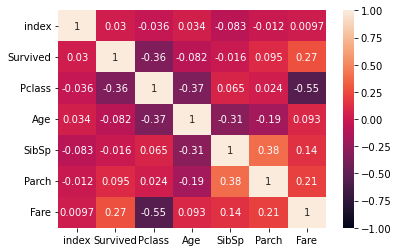

In [14]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show

### 'Crianças e mulheres primeiro'?

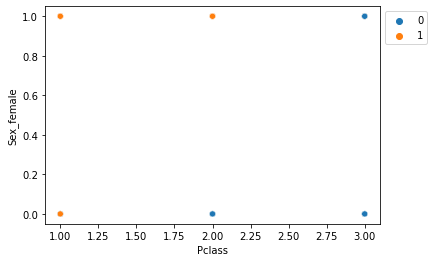

In [15]:
sns.scatterplot(data=df_dummy, x = 'Pclass', y = 'Sex_female', hue = 'Survived')
plt.legend(bbox_to_anchor=(1.0, 1.0))

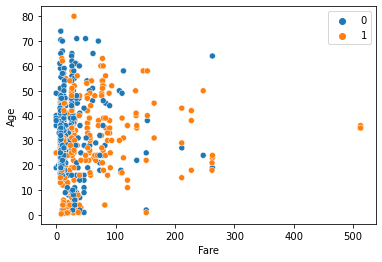

In [16]:
sns.scatterplot(data=df, x = 'Fare', y = 'Age', hue = 'Survived')
plt.legend(bbox_to_anchor=(1.0, 1.0))

#### Para fins de comparação, £50 em 1912 equivalem a £6,749.63 em 2022.

## Aplicando o modelo KNN

In [17]:
# Coloque as 'features'.
x = np.array(df_dummy.drop(['Survived'], axis=1))
# Coloque o 'target'.
y = np.array(df_dummy['Survived'])

In [18]:
# Estabeleça o intervalo de treino e teste.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
# Padronize a variação
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [20]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 7, metric='euclidean')

In [21]:
clf.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [22]:
accuracy = clf.score(x_test, y_test)
accuracy

0.8111888111888111

## Visualização da Fronteira

In [23]:
def knn_comparison(data, k):
    x = data[['Fare','Age']].astype(int).values
    y = data['Survived'].astype(int).values
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel('Fare')
    plt.ylabel('Age')
    plt.title('K='+ str(k))
    plt.show

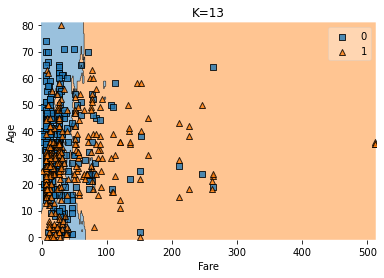

In [24]:
knn_comparison(data = df_dummy, k = 13)

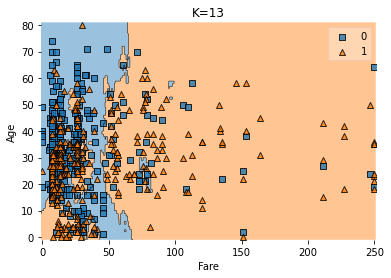

In [25]:
# Estabeleça um teto para 'Fare' (opcional).
df_dummy.loc[df_dummy['Fare'] > 250, 'Fare'] = 250

knn_comparison(data = df_dummy, k = 13)

In [26]:
df_dummy.head(1).T

,0
Survived,0.00
Pclass,3.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Sex_female,0.00
Cabin_1,0.00
Embarked_C,0.00
Embarked_Q,0.00


## Jack teria sobrevivido sem a Rose?

In [27]:
jack = np.array([3,22,0,0,7,0,0,0,0,1])
jack = jack.reshape(1,-1)
jack = sc_x.transform(jack)

predict = clf.predict(jack)

print(predict)

[0]
